# Análise de Amostras com Teste de Normalidade e Teste-T

Este notebook utiliza os dados de treinamento e validação do autoencoder, fornecidos em um arquivo CSV, para realizar as seguintes análises:
1. Seleção de amostras aleatórias com \( n < 30 \).
2. Teste de Kolmogorov-Smirnov para verificar se as amostras seguem distribuição Normal.
3. Repetição até encontrar duas amostras Normais (p-value ≥ 0.8).
4. Teste-T para verificar diferenças significativas entre as médias das amostras.
5. Cálculo de intervalos de confiança para as médias.

## Importação dos Dados

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kstest, ttest_ind, norm
import matplotlib.pyplot as plt

# Carregar os dados do CSV
csv_path = "01_janeiro_loss_history.csv"
data = pd.read_csv(csv_path)

# Selecionar colunas relevantes
loss = data['train_loss']
val_loss = data['val_loss']

## Etapa 1: Seleção de Amostras Aleatórias

Serão selecionadas pequenas amostras com tamanho \( n < 30 \) para realizar as análises.

In [2]:
np.random.seed(42)
samples = []

# Gerar amostras aleatórias até encontrar 2 normais
while len(samples) < 2:
    # Selecionar uma amostra aleatória
    sample = np.random.choice(loss, size=30, replace=False)
    # Teste de normalidade (Kolmogorov-Smirnov)
    stat, p_value = kstest(sample, 'norm', args=(np.mean(sample), np.std(sample)))
    if p_value >= 0.8:
        samples.append(sample)
        print(f"Amostra aceita (p-value={p_value:.3f})")

# Garantir que temos duas amostras
if len(samples) < 2:
    print("Não foi possível encontrar duas amostras normais.")
else:
    print("Duas amostras normais encontradas.")

Amostra aceita (p-value=0.823)
Amostra aceita (p-value=0.820)
Duas amostras normais encontradas.


## Etapa 2: Teste de Normalidade

A amostra é considerada normal se o p-value do teste for maior ou igual a 0.8.

In [3]:
# Exibir os p-values das amostras selecionadas
for i, sample in enumerate(samples, start=1):
    stat, p_value = kstest(sample, 'norm', args=(np.mean(sample), np.std(sample)))
    print(f"Amostra {i}: p-value = {p_value:.3f}")

Amostra 1: p-value = 0.823
Amostra 2: p-value = 0.820


## Etapa 3: Teste-T para Diferença de Médias

Verificar se as médias das amostras possuem diferença significativa.

In [4]:
# Teste T
sample1, sample2 = samples
t_stat, t_p_value = ttest_ind(sample1, sample2)
print(f"Teste T: Estatística={t_stat:.3f}, p-value={t_p_value:.3f}")

Teste T: Estatística=-0.423, p-value=0.674


## Etapa 4: Intervalos de Confiança

Calcular os intervalos de confiança para os níveis de 90%, 95% e 99%.

In [5]:
confidence_levels = [0.90, 0.95, 0.99]
intervals = []

for level in confidence_levels:
    z = norm.ppf(1 - (1 - level) / 2)
    ci1 = (np.mean(sample1) - z * np.std(sample1, ddof=1) / np.sqrt(len(sample1)),
           np.mean(sample1) + z * np.std(sample1, ddof=1) / np.sqrt(len(sample1)))
    ci2 = (np.mean(sample2) - z * np.std(sample2, ddof=1) / np.sqrt(len(sample2)),
           np.mean(sample2) + z * np.std(sample2, ddof=1) / np.sqrt(len(sample2)))
    intervals.append((level, ci1, ci2))
    print(f"Intervalo de Confiança ({int(level * 100)}%): Amostra 1={ci1}, Amostra 2={ci2}")

Intervalo de Confiança (90%): Amostra 1=(0.2857870900585206, 0.28723428210080154), Amostra 2=(0.2860119448963701, 0.28755295407137277)
Intervalo de Confiança (95%): Amostra 1=(0.2856484682399981, 0.287372903919324), Amostra 2=(0.28586433663985844, 0.28770056232788443)
Intervalo de Confiança (99%): Amostra 1=(0.2853775397591344, 0.28764383240018776), Amostra 2=(0.28557584467570796, 0.2879890542920349)


## Etapa 5: Visualização das Distribuições

Será gerado um gráfico para visualizar as distribuições das amostras selecionadas.

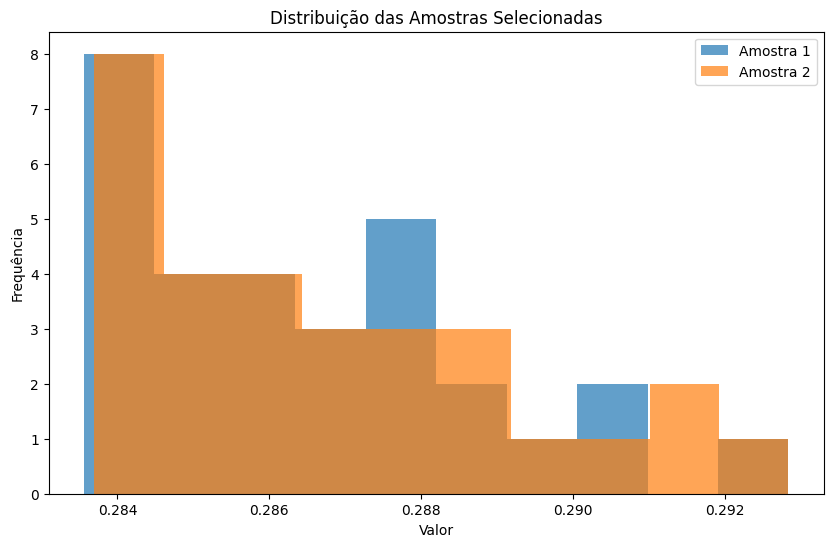

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(sample1, bins=10, alpha=0.7, label='Amostra 1')
plt.hist(sample2, bins=10, alpha=0.7, label='Amostra 2')
plt.title('Distribuição das Amostras Selecionadas')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()
plt.show()

## Conclusões

1. As amostras selecionadas são normais, conforme os resultados do teste de Kolmogorov-Smirnov.
2. O Teste-T indica se há ou não diferença significativa entre as médias das amostras.
3. Os intervalos de confiança fornecem uma medida de incerteza para as médias das amostras em diferentes níveis de confiança.